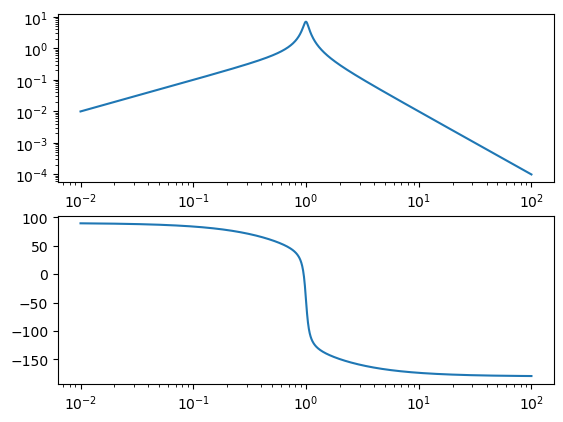

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import control


s = control.tf("s")
wn = 1*2*np.pi
q = 10


plant = wn**2 / (s**2 + wn/q*s + wn**2)

controller = 1 * s / (s+wn)**1

oltf = controller*plant

f = np.logspace(-2, 2, 1024)
plt.subplot(211)
plt.loglog(f, abs(oltf(1j*2*np.pi*f)))
plt.subplot(212)
plt.semilogx(f, np.angle(oltf(1j*2*np.pi*f), deg=True))

In [9]:
import scipy.signal
z, p, k = scipy.signal.tf2zpk(plant.num[0][0], plant.den[0][0])
np.savez("model_params/test_plant.npz", zs=z, ps=p, k=k)
z, p, k = scipy.signal.tf2zpk(controller.num[0][0], controller.den[0][0])
np.savez("model_params/test_controller.npz", zs=z, ps=p, k=k)